In [20]:
%matplotlib inline

import geofield
import dipole
import scipy, numpy
from matplotlib import pyplot, rcParams
rcParams.update({'font.family': "Source Sans Pro"})
rcParams.update({'font.size': 18})

In [17]:
import importlib
importlib.reload(dipole); importlib.reload(geofield)

<module 'geofield' from '/home/yo/Programs/python/geofieldpy/geofield.py'>

In [20]:
gcomp=geofield.ChaosData("../data/CHAOS5X/gauss_coeff_chaos5x.dat").gcomp[0,1:]

In [17]:
dipole.power(gcomp,1), dipole.power(gcomp,2)

(910313951.82046819, 23219345.026857015)

In [24]:
x,y,z=dipole.ecc_dipole(gcomp)

In [28]:
s,z,phi=dipole.xyz2cyl(x,y,z)

In [29]:
s

496.9873142110668

In [30]:
z

234.84319069952653

In [32]:
scipy.rad2deg(phi)

143.90180204591323

In [18]:
sha=geofield.SHADIFData("../../data/sha.dif.14k/coef_EPSL_tnmgh.dat", "../../data/sha.dif.14k/error_coef_EPSL_tnmgh.dat")

__Single iteration__

In [10]:
x,y,z=dipole.ecc_dipole(sha.gcomp)

In [32]:
s,z,phi=dipole.xyz2cyl(x,y,z)
r=scipy.sqrt(x**2+y**2+z**2)

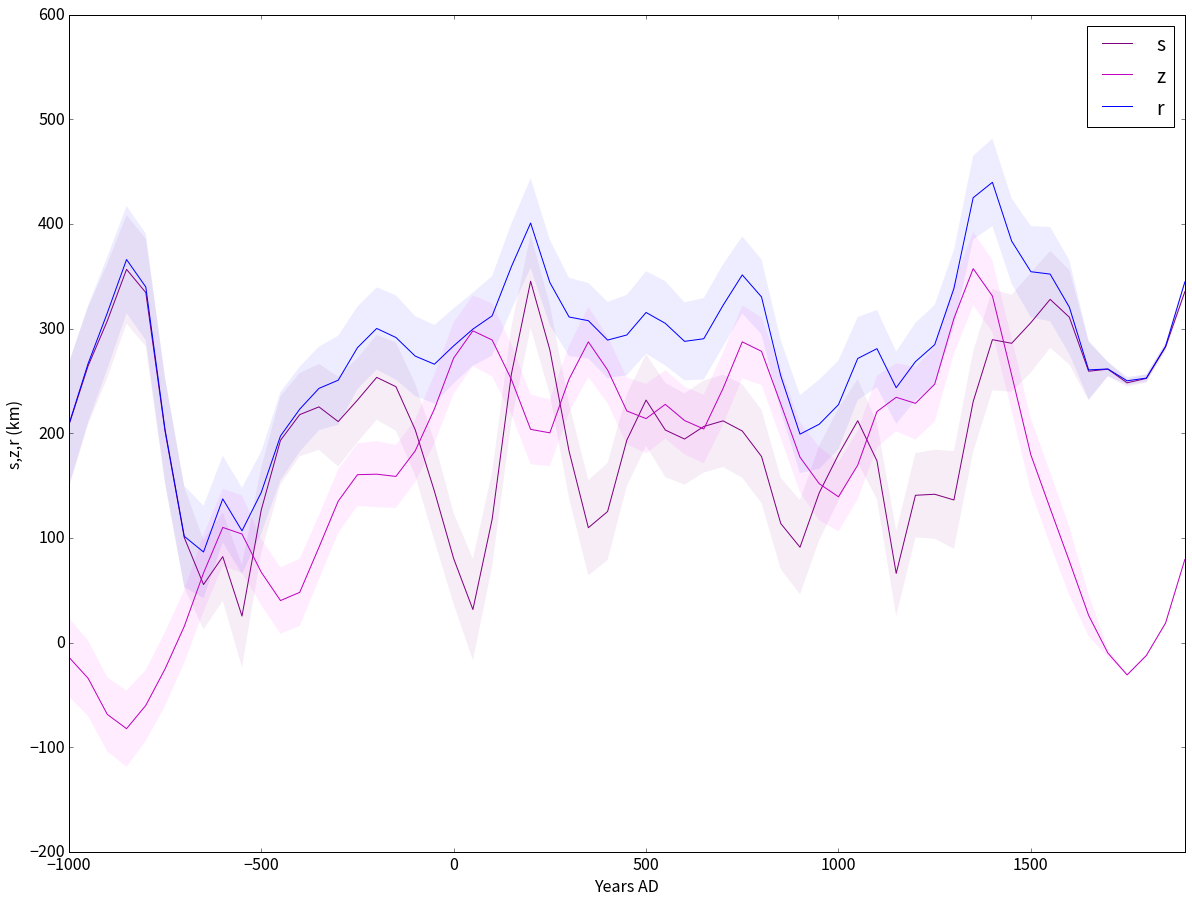

In [80]:
fig, ax = pyplot.subplots(figsize=(20,15))

ax.plot(sha.years, s, color="purple", label="s")
ax.plot(sha.years, z, "m-", label="z")
ax.plot(sha.years, r, "b-", label="r")

ax.fill_between(sha.years, r-r_dev, r+r_dev, color="blue", lw=0, alpha=0.07)
ax.fill_between(sha.years, z-z_dev, z+z_dev, color="magenta", lw=0, alpha=0.07)
ax.fill_between(sha.years, s-s_dev, s+s_dev, color="purple", lw=0, alpha=0.07)

ax.set_xlabel("Years AD")
ax.set_ylabel("s,z,r (km)")
ax.legend()

ax.set_xbound(-1000,sha.years[-1])

pyplot.show(fig)

En esta gráfica están representadas las coordenadas del centro del dipolo excéntrico *s* (distancia radial entre el centro del dipolo y el eje de rotación), *z* (coordenada vertical del centro del dipolo respecto del plano del ecuador), y *r* (distancia entre el centro del dipolo y el centro de la Tierra), obtenidas a partir del modelo SHA.DIF.14k.

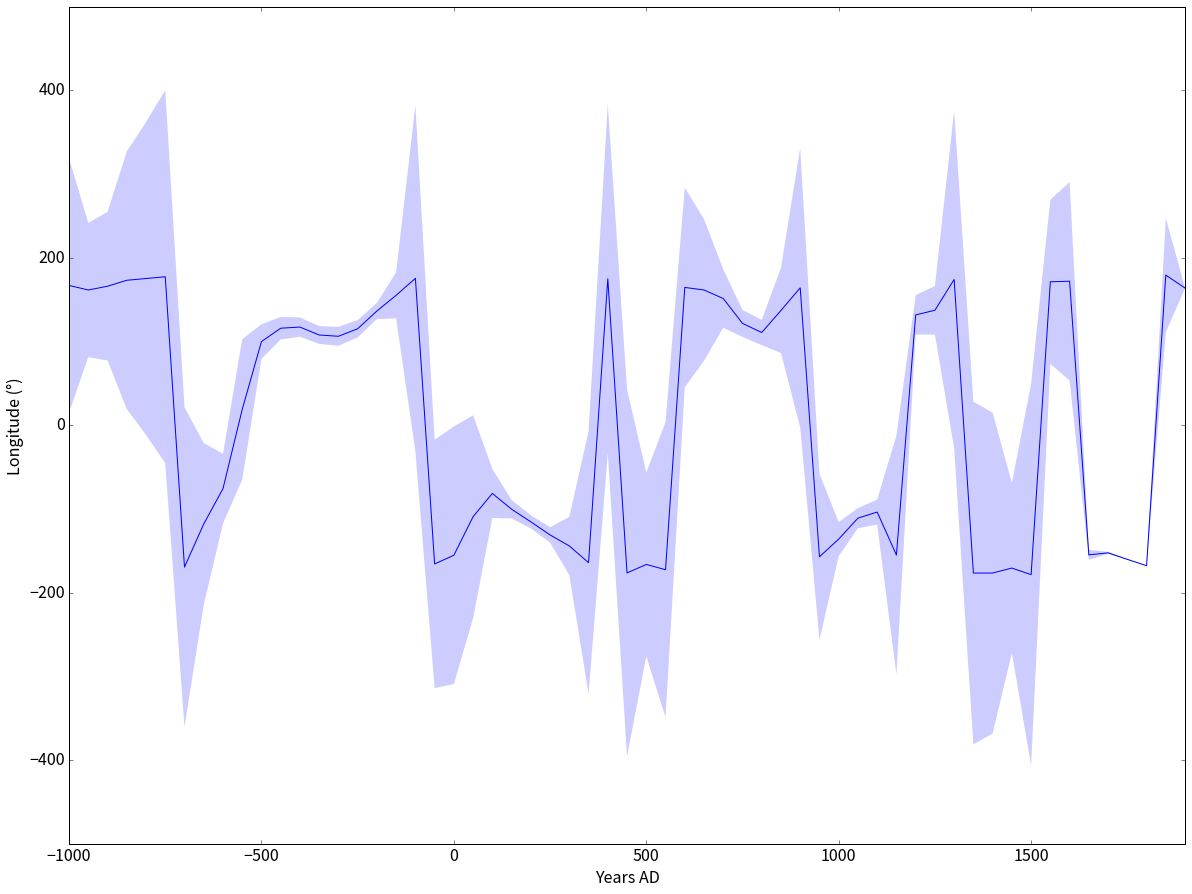

In [81]:
fig, ax = pyplot.subplots(figsize=(20,15))

ax.plot(sha.years, scipy.rad2deg(phi), "b-")
ax.fill_between(sha.years, scipy.rad2deg(phi-phi_dev), scipy.rad2deg(phi+phi_dev), lw=0, alpha=0.2)

ax.set_xlabel("Years AD")
ax.set_ylabel("Longitude (°)")

ax.set_xbound(-1000, sha.years[-1])

pyplot.show(fig)

L

__Bootstrap__

In [74]:
iterations = 1000

xs = numpy.zeros((iterations,len(sha.years)))
ys = xs.copy()
zs = xs.copy()

gshort = sha.gcomp[..., :8]
gshort_err = sha.gcomp_err[..., :8] #doesn't exist yet

for i in range(iterations):
    gi = gshort+numpy.random.randn(*gshort.shape)*gshort_err
    xs[i,:], ys[i,:], zs[i,:] = dipole.ecc_dipole(gi)
    
x = xs.sum(axis=0)/iterations
y = ys.sum(axis=0)/iterations
z = zs.sum(axis=0)/iterations

ss, zs, phis = dipole.xyz2cyl(xs,ys,zs)
rs = numpy.sqrt(xs**2+ys**2+zs**2)
s, z, phi = dipole.xyz2cyl(x,y,z)
r = numpy.sqrt(x**2+y**2+z**2)

s_dev = numpy.sqrt(((ss-s)**2).sum(axis=0)/iterations)
z_dev = numpy.sqrt(((zs-z)**2).sum(axis=0)/iterations)
r_dev = numpy.sqrt(((rs-r)**2).sum(axis=0)/iterations)
phi_dev = numpy.sqrt(((phis-phi)**2).sum(axis=0)/iterations)

In [30]:
x.shape

(279,)

In [28]:
xs.shape

(1000, 279)

In [35]:
ss.shape

(1000, 279)